<a href="https://colab.research.google.com/github/NileshPatil24-a/Deep_Learning/blob/main/feature_scalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("soheiltehranipour/very-simple-dataset-of-social-network-ads")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'very-simple-dataset-of-social-network-ads' dataset.
Path to dataset files: /kaggle/input/very-simple-dataset-of-social-network-ads


In [ ]:

import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/soheiltehranipour/very-simple-dataset-of-social-network-ads/versions/1/Social_Network_Ads.csv')

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

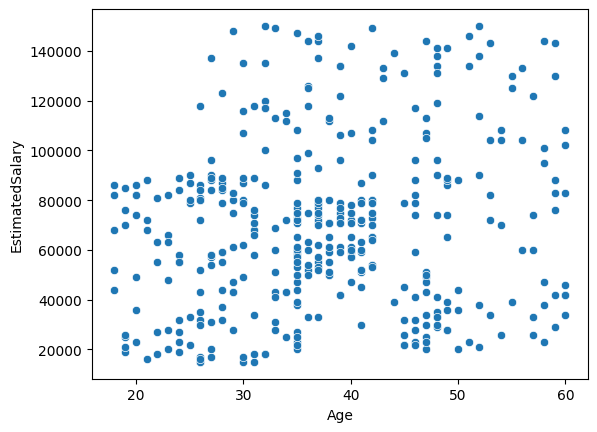

In [ ]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])

In [ ]:
X = df.iloc[:, :2]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaler ,y_train, validation_data=(X_test_scaler,y_test), epochs=100, verbose=0)

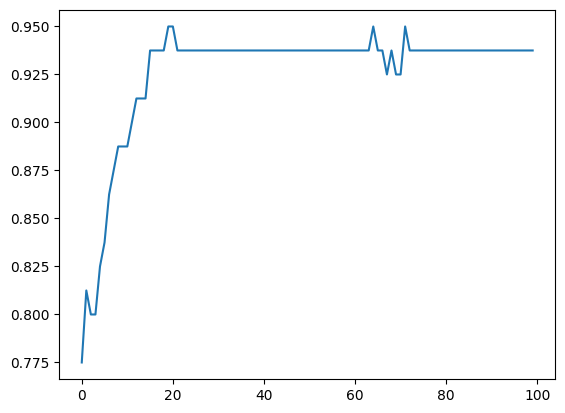

In [ ]:
plt.plot(history.history['val_accuracy'])